<a href="https://colab.research.google.com/github/Ninkrn/bsc_dpdm22/blob/main/Mid_BPDM22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

In [38]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import json
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error as MAPE

In [19]:

/#เชื่อม google drive 
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [20]:
import os
os.chdir('/content/gdrive/MyDrive/Mid BPDM')

#Data House

## บ้านมือ 2

In [29]:
link = 'https://docs.google.com/spreadsheets/d/1REdJzoGqhVn3fnM1I0GoSLzzeW2dAr2UNo1b64hNbJY/export?format=xlsx'
home2 = pd.read_excel(link,sheet_name='บ้านมือ2')
home2.head()


,id,name_th,name_en,project_name,company,province,district,sub_district,property_type,home improvement,...,furniture,building_number,number_of_building,floor_number,parking_percentage,has_pool,has_keycard,has_security,has_fitness,has_garden
0,1.0,บ้านเดี่ยว ชนบท ขอนแก่น,บ้านเดี่ยว ชนบท ขอนแก่น,บ้านวังเวิน,NaN,ขอนแก่น,ชนบท,ศรีบุญเรือง,บ้านเดี่ยว,no,...,ไม่มี,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,บ้านเดี่ยว น้ำพอง ขอนแก่น,บ้านเดี่ยว น้ำพอง ขอนแก่น,บ้านหนองบัวบาน,NaN,ขอนแก่น,น้ำพอง,ทรายมูล,บ้านเดี่ยว,no,...,ไม่มี,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16.0,บ้านเดี่ยว มัญจาคีรี ขอนแก่น,บ้านเดี่ยว มัญจาคีรี ขอนแก่น,NaN,NaN,ขอนแก่น,มัญจาคีรี,กุดเค้า,บ้านเดี่ยว,no,...,ไม่ระบุ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18.0,บ้านเดี่ยว เมืองขอนแก่น หมู่บ้านชลลดา,บ้านเดี่ยว เมืองขอนแก่น หมู่บ้านชลลดา,ชลลดา ขอนแก่น,บริษัท แลนด์แอนด์เฮ้าส์ จำกัด (มหาชน),ขอนแก่น,เมืองขอนแก่น,บ้านเป็ด,บ้านเดี่ยว,no,...,ไม่ระบุ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19.0,บ้านเดี่ยว เมืองขอนแก่น หมู่บ้านเบสต์โฮม,บ้านเดี่ยว เมืองขอนแก่น หมู่บ้านเบสต์โฮม,เบสท์โฮม,เบสท์โฮม เลี่ยงเมืองขอนแก่น,ขอนแก่น,เมืองขอนแก่น,บ้านเป็ด,บ้านเดี่ยว,no,...,ไม่ระบุ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
home2.columns

Index(['id', 'name_th', 'name_en', 'project_name', 'company', 'province',
       'district', 'sub_district', 'property_type', 'home improvement',
       'renovate', 'public utility', 'land type', 'land wide(m)',
       'land long(m)', 'topsoil', 'corner', 'zip_code', 'zone', 'alley',
       'street', 'latitude', 'longitude', 'number_of_rai', 'number_of_ngan',
       'number_of_va', 'construct_year', 'model', 'sell_price',
       'number_of_unit', 'number_of_story', 'number_of_bedroom',
       'number_of_bathroom', 'number_of_parking', 'usable_area',
       'central_cost', 'direction', 'furniture', 'building_number',
       'number_of_building', 'floor_number', 'parking_percentage', 'has_pool',
       'has_keycard', 'has_security', 'has_fitness', 'has_garden'],
      dtype='object')

In [31]:
home2 = home2[['renovate','number_of_rai','number_of_ngan','number_of_va','number_of_story','number_of_bedroom','number_of_bathroom','direction','furniture','usable_area','number_of_parking', 'sell_price']]

In [32]:
home2.head()

,renovate,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,number_of_parking,sell_price
0,no,0.0,1.0,45.0,2.0,2.0,2.0,ไม่ระบุ,ไม่มี,244.0,2.0,390000.0
1,no,0.0,0.0,88.0,1.0,1.0,1.0,ไม่ระบุ,ไม่มี,164.0,3.0,820000.0
2,no,1.0,0.0,8.0,1.0,11.0,11.0,ไม่ระบุ,ไม่ระบุ,489.0,9.0,3260000.0
3,no,0.0,0.0,61.6,2.0,3.0,3.0,ไม่ระบุ,ไม่ระบุ,203.0,2.0,5000000.0
4,no,0.0,0.0,72.3,2.0,3.0,2.0,ไม่ระบุ,ไม่ระบุ,164.0,2.0,3500000.0


In [33]:
home2['second_hand'] = 'บ้านมือ2'     

In [36]:
home2

,renovate,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,number_of_parking,sell_price,second_hand
0,no,0.0,1.0,45.0,2.0,2.0,2.0,ไม่ระบุ,ไม่มี,244.00,2.0,390000.0,บ้านมือ2
1,no,0.0,0.0,88.0,1.0,1.0,1.0,ไม่ระบุ,ไม่มี,164.00,3.0,820000.0,บ้านมือ2
2,no,1.0,0.0,8.0,1.0,11.0,11.0,ไม่ระบุ,ไม่ระบุ,489.00,9.0,3260000.0,บ้านมือ2
3,no,0.0,0.0,61.6,2.0,3.0,3.0,ไม่ระบุ,ไม่ระบุ,203.00,2.0,5000000.0,บ้านมือ2
4,no,0.0,0.0,72.3,2.0,3.0,2.0,ไม่ระบุ,ไม่ระบุ,164.00,2.0,3500000.0,บ้านมือ2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1651,no,0.0,0.0,73.0,1.0,2.0,1.0,ไม่ระบุ,ไม่ระบุ,108.76,NaN,437400.0,บ้านมือ2
1652,no,0.0,0.0,84.0,1.0,2.0,1.0,ไม่ระบุ,ไม่ระบุ,119.00,NaN,714600.0,บ้านมือ2
1653,no,0.0,1.0,45.0,2.0,1.0,1.0,ไม่ระบุ,ไม่ระบุ,188.50,NaN,451000.0,บ้านมือ2
1654,no,0.0,1.0,59.0,2.0,1.0,1.0,ไม่ระบุ,ไม่ระบุ,207.00,NaN,910000.0,บ้านมือ2


In [35]:
home2.isnull().any()  #falseคือไม่มีค่าว่าง trueคือมีค่าว่าง

renovate               True
number_of_rai         False
number_of_ngan        False
number_of_va          False
number_of_story        True
number_of_bedroom      True
number_of_bathroom    False
direction             False
furniture             False
usable_area            True
number_of_parking      True
sell_price             True
second_hand           False
dtype: bool

In [60]:
print(home2.isnull().sum()) 

renovate              211
number_of_rai           0
number_of_ngan          0
number_of_va            0
number_of_story       549
number_of_bedroom      27
number_of_bathroom      0
direction               0
furniture               0
usable_area           920
number_of_parking     215
sell_price              1
second_hand             0
dtype: int64


In [53]:
print(len(home2[home2['renovate'].isnull()])) 

211


In [57]:
print(len(home2[home2['number_of_bedroom'].isnull()]))

27


In [55]:
print(len(home2[home2['number_of_story'].isnull()])) 

549


In [ ]:
plt.boxplot(home2['number_of_bathroom'],positions = [1] )
plt.boxplot(home2['sell_price'],positions = [2] )
plt.boxplot(home2['PetalLength'],positions = [3] ); #setosa การกระจายน้อย มี outliner .......vertinicaมีการกระจายมาก ไม่มีoutliner

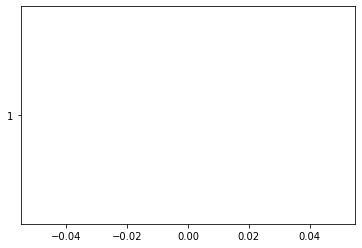

In [42]:
bpp = plt.boxplot(home2['sell_price'],vert=False)

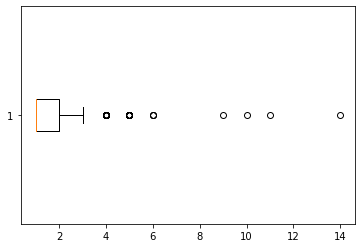

In [40]:
bpb = plt.boxplot(home2['number_of_bathroom'],vert=False)

## บ้านมือ 1

In [43]:
link = 'https://docs.google.com/spreadsheets/d/1REdJzoGqhVn3fnM1I0GoSLzzeW2dAr2UNo1b64hNbJY/export?format=xlsx'
home1 = pd.read_excel(link,sheet_name='บ้านมือ1')
home1.head()

,id,parent_id,project_name,province,district,sub_district,zip_code,zone_id,zone,property_type,...,cable_free,cable_none,cable_ask,position_previous,position_current,sold_out_at,is_pro_in_house,created_at,updated_at,deleted_at
0,314.0,41.0,ที สเปซ กลางเมือง,ขอนแก่น,เมืองขอนแก่น,เมืองเก่า,NaN,5.0,กลางเมือง-เมืองเก่า-กุดกว้าง,บ้านเดี่ยว,...,NaN,NaN,NaN,0.0,0.0,NaN,0.0,44012.0,44602.0,NaN
1,315.0,41.0,ที สเปซ กลางเมือง,ขอนแก่น,เมืองขอนแก่น,เมืองเก่า,NaN,5.0,กลางเมือง-เมืองเก่า-กุดกว้าง,บ้านแฝด,...,NaN,NaN,NaN,0.0,0.0,NaN,0.0,44012.0,44602.0,NaN
2,316.0,41.0,ที สเปซ กลางเมือง,ขอนแก่น,เมืองขอนแก่น,เมืองเก่า,NaN,5.0,กลางเมือง-เมืองเก่า-กุดกว้าง,บ้านเดี่ยว,...,NaN,NaN,NaN,0.0,0.0,NaN,0.0,44012.0,44602.0,NaN
3,317.0,41.0,ที สเปซ กลางเมือง,ขอนแก่น,เมืองขอนแก่น,เมืองเก่า,NaN,5.0,กลางเมือง-เมืองเก่า-กุดกว้าง,บ้านเดี่ยว,...,NaN,NaN,NaN,0.0,0.0,NaN,0.0,44012.0,44602.0,NaN
4,318.0,41.0,ที สเปซ กลางเมือง,ขอนแก่น,เมืองขอนแก่น,เมืองเก่า,NaN,5.0,กลางเมือง-เมืองเก่า-กุดกว้าง,บ้านเดี่ยว,...,NaN,NaN,NaN,0.0,0.0,NaN,0.0,44012.0,44602.0,NaN


In [44]:
home1.columns

Index(['id', 'parent_id', 'project_name', 'province', 'district',
       'sub_district', 'zip_code', 'zone_id', 'zone', 'property_type',
       ...
       'cable_free', 'cable_none', 'cable_ask', 'position_previous',
       'position_current', 'sold_out_at', 'is_pro_in_house', 'created_at',
       'updated_at', 'deleted_at'],
      dtype='object', length=141)

In [46]:
home1 = home1[['number_of_rai','number_of_ngan','number_of_va','number_of_story','number_of_bedroom','number_of_bathroom','direction','furniture','usable_area','number_of_parking', 'sell_price']]

In [47]:
home1.head()

,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,number_of_parking,sell_price
0,NaN,NaN,50.00,2.0,4.0,3.0,0.0,0.0,185.0,2.0,3950000.0
1,NaN,NaN,40.00,2.0,4.0,3.0,0.0,0.0,165.0,2.0,3250000.0
2,NaN,NaN,77.25,2.0,4.0,3.0,0.0,0.0,260.0,2.0,6300000.0
3,NaN,NaN,81.25,2.0,6.0,5.0,0.0,0.0,343.0,3.0,6900000.0
4,NaN,NaN,55.00,2.0,4.0,4.0,0.0,0.0,223.0,2.0,4490000.0


In [48]:
home1['second_hand'] = 'บ้านมือ1'     

<ipython-input-48-d38917fe9517>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home1['second_hand'] = 'บ้านมือ1'


In [49]:
home1

,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,number_of_parking,sell_price,second_hand
0,NaN,NaN,50.00,2.0,4.0,3.0,0.0,0.0,185.0,2.0,3950000.0,บ้านมือ1
1,NaN,NaN,40.00,2.0,4.0,3.0,0.0,0.0,165.0,2.0,3250000.0,บ้านมือ1
2,NaN,NaN,77.25,2.0,4.0,3.0,0.0,0.0,260.0,2.0,6300000.0,บ้านมือ1
3,NaN,NaN,81.25,2.0,6.0,5.0,0.0,0.0,343.0,3.0,6900000.0,บ้านมือ1
4,NaN,NaN,55.00,2.0,4.0,4.0,0.0,0.0,223.0,2.0,4490000.0,บ้านมือ1
...,...,...,...,...,...,...,...,...,...,...,...,...
749,NaN,NaN,NaN,1.0,3.0,2.0,NaN,NaN,125.0,2.0,2290000.0,บ้านมือ1
750,NaN,NaN,NaN,1.0,3.0,2.0,NaN,NaN,70.0,2.0,2590000.0,บ้านมือ1
751,NaN,NaN,NaN,1.0,3.0,2.0,NaN,NaN,120.0,2.0,1990000.0,บ้านมือ1
752,NaN,NaN,NaN,1.0,3.0,2.0,NaN,NaN,100.0,2.0,1990000.0,บ้านมือ1


#School

In [7]:
with open('/content/gdrive/MyDrive/Mid BPDM/school.json') as json_file:
    school_json = json.loads(json_file.read())

In [9]:
school_json.keys()  #โลเคชั่นของโรงเรียน

dict_keys(['1', '4', '6', '7', '9', '11', '16', '17', '18', '19', '2', '21', '22', '23', '24', '25', '26', '28', '29', '3', '31', '32', '33', '35', '36', '38', '491', '493', '494', '495', '496', '497', '498', '499', '508', '509', '51', '511', '512', '513', '515', '517', '518', '519', '52', '521', '522', '523', '524', '525', '526', '527', '528', '529', '531', '532', '533', '534', '535', '536', '537', '538', '539', '54', '541', '542', '543', '545', '546', '547', '548', '549', '55', '551', '552', '553', '554', '555', '557', '558', '56', '561', '562', '563', '564', '565', '566', '567', '568', '569', '57', '571', '572', '573', '574', '575', '576', '577', '578', '579', '58', '581', '582', '583', '584', '585', '586', '587', '588', '589', '59', '591', '592', '593', '594', '595', '596', '597', '598', '601', '602', '603', '604', '605', '606', '607', '608', '609', '61', '611', '612', '613', '614', '615', '616', '617', '618', '619', '62', '621', '622', '623', '624', '625', '626', '627', '628', '62

In [10]:
len(school_json)#ดูว่ามีkeyทั้งหมดเท่าไหร่

3543

#Seven

In [50]:
with open('/content/gdrive/MyDrive/Mid BPDM/7-eleven.json') as json_file:
    this_json = json.loads(json_file.read())

In [51]:
this_json.keys()  #โลเคชั่นของเซเว่น

dict_keys(['1', '4', '6', '7', '9', '11', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '28', '29', '30', '31', '32', '33', '35', '36', '38', '40', '491', '493', '494', '495', '496', '497', '498', '499', '508', '509', '510', '511', '512', '513', '515', '517', '518', '519', '520', '521', '522', '523', '524', '525', '526', '527', '528', '529', '531', '532', '533', '534', '535', '536', '537', '538', '539', '540', '541', '542', '543', '545', '546', '547', '548', '549', '550', '551', '552', '553', '554', '555', '557', '558', '560', '561', '562', '563', '564', '565', '566', '567', '568', '569', '570', '571', '572', '573', '574', '575', '576', '577', '578', '579', '580', '581', '582', '583', '584', '585', '586', '587', '588', '589', '590', '591', '592', '593', '594', '595', '596', '597', '598', '600', '601', '602', '603', '604', '605', '606', '607', '608', '609', '610', '611', '612', '613', '614', '615', '616', '617', '618', '619', '620', '621', '622', '623', '624', '625',

In [52]:
len(this_json)#ดูว่ามีkeyทั้งหมดเท่าไหร่

3653